### Import TensorFlow

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 5s 0us/step


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


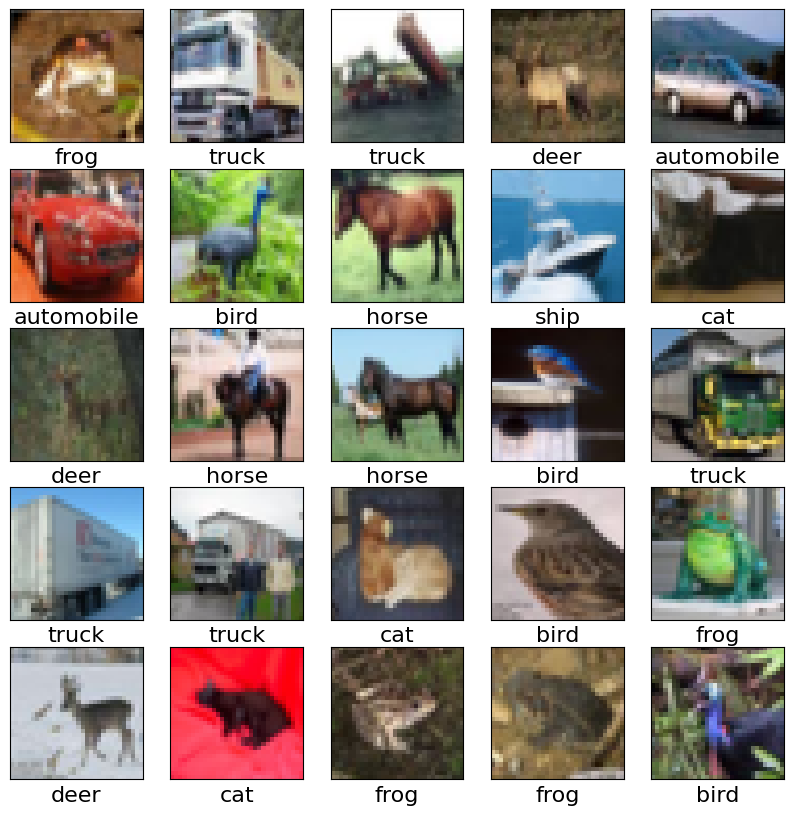

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Building the models (MLP and CNN)

In [5]:
#MLP

MLP = models.Sequential()
MLP.add(layers.InputLayer(input_shape=(32,32,3)))
MLP.add(layers.Flatten())
MLP.add(layers.Dense(256, activation='relu', use_bias=True))
MLP.add(layers.Dense(256, activation='relu', use_bias=True))
MLP.add(layers.Dense(10))

MLP.summary()
MLP.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 855050 (3.26 MB)
Trainable params: 855050 (3.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
CNN = models.Sequential(
    [
        layers.InputLayer(input_shape=(32,32,3)),
        layers.RandomFlip("horizontal"), #Agregamos esto al ejemplo
        layers.RandomCrop(30,30), #Agregamos esto al ejemplo
        layers.RandomRotation(0.15), #Agregamos esto al ejemplo
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.3), #Agregamos esto al ejemplo
        layers.Dense(10, activation="softmax"),
    ]
)

CNN.summary()
CNN.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 32, 32, 3)         0         
                                                                 
 random_crop (RandomCrop)    (None, 30, 30, 3)         0         
                                                                 
 random_rotation (RandomRot  (None, 30, 30, 3)         0         
 ation)                                                          
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)      

Model training

In [12]:
history_mlp = MLP.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2690 - accuracy: 0.5447 - val_loss: 1.5163 - val_accuracy: 0.4743
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2628 - accuracy: 0.5452 - val_loss: 1.4712 - val_accuracy: 0.4924
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2656 - accuracy: 0.5459 - val_loss: 1.5076 - val_accuracy: 0.4850
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2541 - accuracy: 0.5496 - val_loss: 1.4986 - val_accuracy: 0.4787
Epoch 5/30
1563/1563 [==============================] - 5s 4ms/step - loss: 1.2549 - accuracy: 0.5502 - val_loss: 1.4852 - val_accuracy: 0.4910
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2464 - accuracy: 0.5528 - val_loss: 1.5065 - val_accuracy: 0.4836
Epoch 7/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2462 - accuracy: 0.5504 - val_loss: 1.4916 - val_accuracy:

In [ ]:
history_cnn = CNN.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 [==============================] - 15s 7ms/step - loss: 1.6639 - accuracy: 0.4017 - val_loss: 1.3623 - val_accuracy: 0.5210
Epoch 2/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4347 - accuracy: 0.4901 - val_loss: 1.2116 - val_accuracy: 0.5669
Epoch 3/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3455 - accuracy: 0.5242 - val_loss: 1.1454 - val_accuracy: 0.5989
Epoch 4/30
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2861 - accuracy: 0.5478 - val_loss: 1.1250 - val_accuracy: 0.6063
Epoch 5/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2430 - accuracy: 0.5604 - val_loss: 1.0531 - val_accuracy: 0.6291
Epoch 6/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2147 - accuracy: 0.5725 - val_loss: 1.0726 - val_accuracy: 0.6282
Epoch 7/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1840 - accuracy: 0.5833 - val_loss: 1.0094 - val_ac

Plot models' results

313/313 - 1s - loss: 1.5786 - accuracy: 0.4707 - 711ms/epoch - 2ms/step


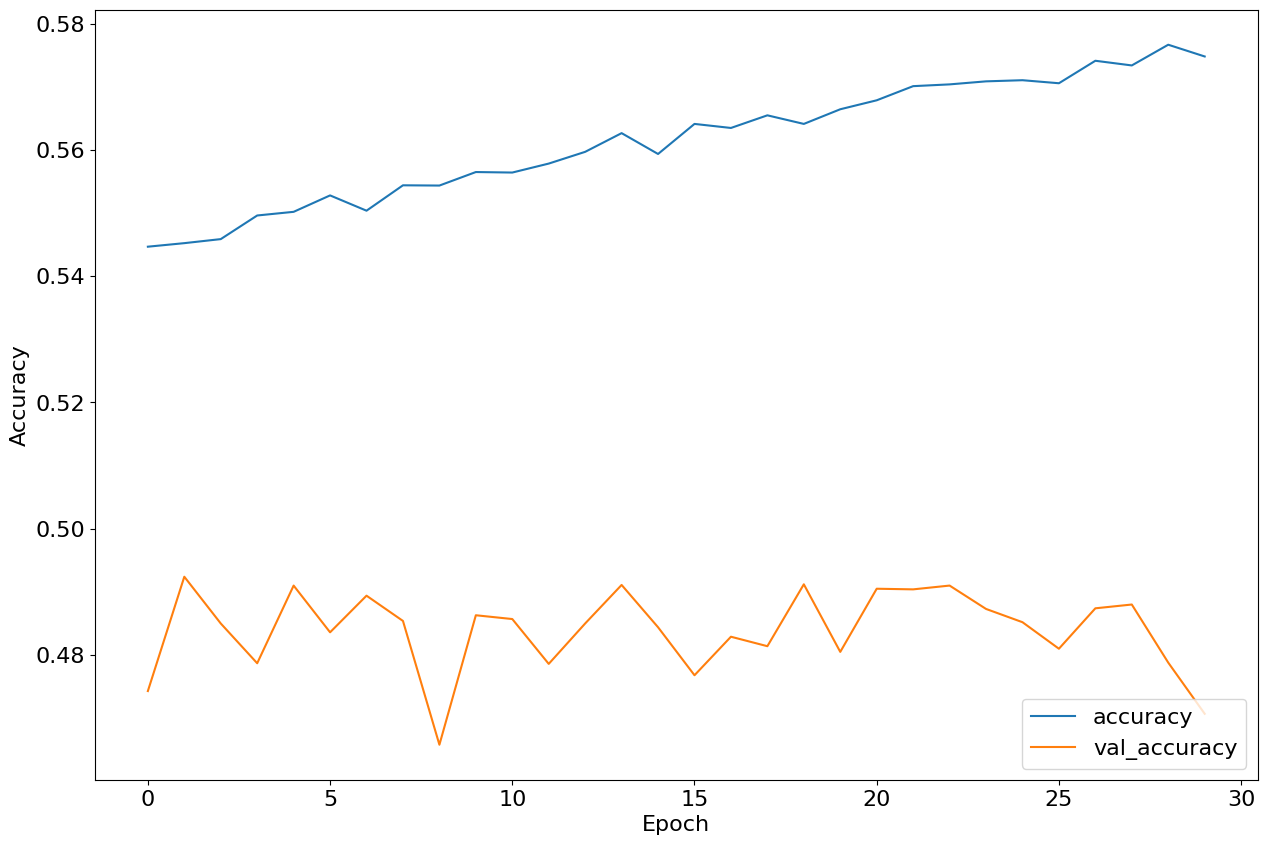

In [ ]:
plt.plot(history_mlp.history['accuracy'], label='accuracy')
plt.plot(history_mlp.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = MLP.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.8600 - accuracy: 0.7016 - 874ms/epoch - 3ms/step


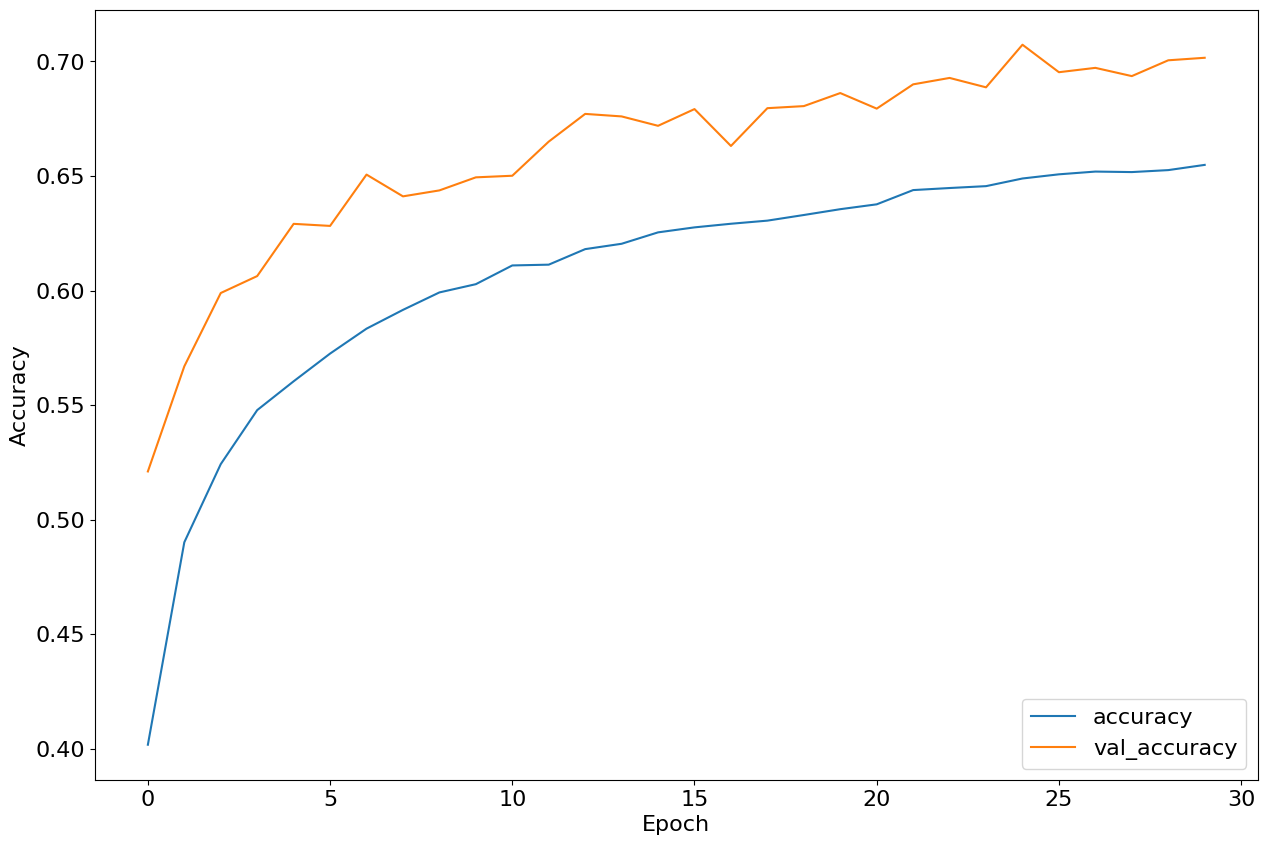

In [ ]:
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = CNN.evaluate(test_images,  test_labels, verbose=2)